In [1]:
# Capstone A Project - Spring 2020
# Kaggle Attrition data - Exploratory Data Analysis Python Code 
# Reference URL:  https://www.kaggle.com/abhishektibrewal/hr-employee-attrition

# data transformation
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime

# data plotting
import seaborn as sns
#from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

# classification & correlation
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics as mt
#import xgboost as xgb




C:\Users\shayden\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':


In [2]:
# What version of Python do you have?
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf



print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

C:\Users\shayden\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\shayden\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\shayden\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\shayden\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarnin

Tensor Flow Version: 1.13.1
Keras Version: 2.2.4-tf

Python 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Pandas 1.0.1
Scikit-Learn 0.22.1
GPU is NOT AVAILABLE


In [3]:
## Importing data from an Excel file:
## Prior to loading the file, convert it to csv in Excel 
## Setting datatypes prior to load

## updated data types to match types in IBM's as listed here:  
## http://inseaddataanalytics.github.io/INSEADAnalytics/groupprojects/January2018FBL/IBM_Attrition_VSS.html

datatypes = {
"Age": "int",
"Attrition": "category",
"BusinessTravel": "category",
"DailyRate": "int",
"Department": "category",
"DistanceFromHome": "int",
"Education": "int", ## changed to int
"EducationField": "category",
"EmployeeCount": "int",
"EmployeeNumber": "int",
"EnvironmentSatisfaction": "int", ## changed
"Gender": "category",
"HourlyRate": "int",
"JobInvolvement": "int", ## changed
"JobLevel": "int", #changed
"JobRole": "category",
"JobSatisfaction": "int", ## changed
"MaritalStatus": "category",
"MonthlyIncome": "int",
"MonthlyRate": "int",
"NumCompaniesWorked": "int",
"Over18": "category",
"OverTime": "category",
"PercentSalaryHike": "float",
"PerformanceRating": "int", ## changed
"RelationshipSatisfaction": "int", ## changed
"StandardHours": "int",
"StockOptionLevel": "int",  ## changed
"TotalWorkingYears": "int",
"TrainingTimesLastYear": "int",
"WorkLifeBalance": "int", #changed
"YearsAtCompany": "int",
"YearsInCurrentRole": "int",
"YearsSinceLastPromotion": "int",
"YearsWithCurrManager": "int"
}

df = pd.read_csv('https://raw.githubusercontent.com/skhayden/SMU-Capstone-Age-Bias-in-Predictive-Modeling-/master/WA_Fn-UseC_-HR-Employee-Attrition.csv',low_memory=False)


# Verifying the upload of the data looking at the first 5 rows
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Verifying the upload of the data looking at the last 5 rows

df.tail()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
# Verifying the dimensions of the data set - (rows, cols)

df.shape

(1470, 35)

In [6]:
# Check what data types the features are

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
# Retrieve simple statistics from the data set

df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
# Exploring our Age feature

df.Age.unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)

In [10]:
# Exploring our Age feature

df.Age.value_counts()

35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

In [11]:
a=list(range(min(df['Age']),max(df['Age'])))
a

[18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59]

In [12]:
#year increments
bin_labels1 = list(range(min(df['Age']),max(df['Age'])))
bins1 = list(range(min(df['Age']),max(df['Age'])))
df['Age_group_Year'] = pd.cut(df['Age'], bins=bins1, labels=bin_labels1[0:len(bin_labels1)-1])



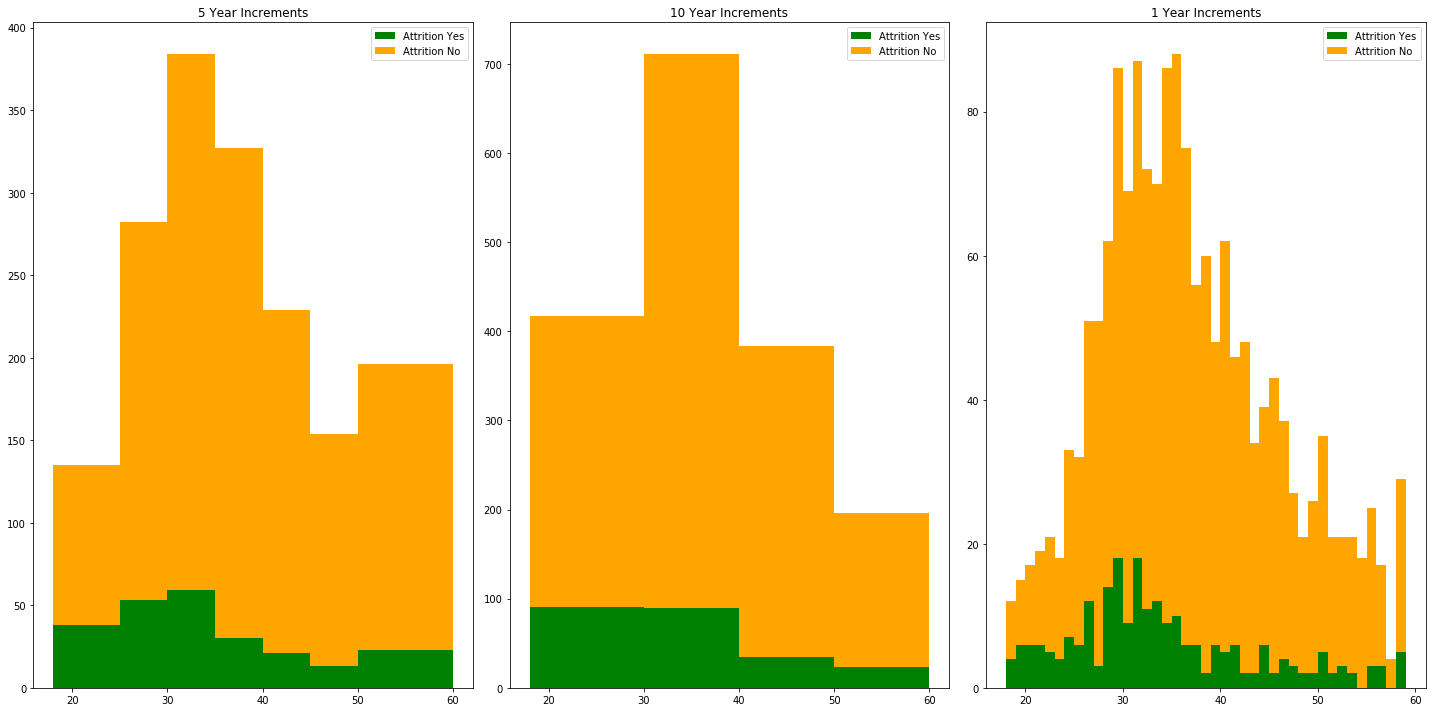

In [13]:
#decade increments
bin_labels10 = ['<=30', '>30 & <=40', '>40 & <=50', '>50']
bins10 = [min(df['Age']), 30, 40, 50, max(df['Age'])]
df['Age_group_Decade'] = pd.cut(df['Age'], bins=bins10, labels=bin_labels10)


#half decade increments
bin_labels5 = ['<=25', '>25 & <=30','>30 & <=35','>35 & <=40','>40 & <=45','>45 & <=50','>50']
bins5 = [min(df['Age']), 25, 30, 35, 40, 45, 50, max(df['Age'])]
df['Age_group_half_Decade'] = pd.cut(df['Age'], bins=bins5, labels=bin_labels5)

#year increments
bin_labels1 = list(range(min(df['Age']),max(df['Age'])))
bins1 = list(range(min(df['Age']),max(df['Age'])))
df['Age_group_Year'] = pd.cut(df['Age'], bins=bins1, labels=bin_labels1[0:len(bin_labels1)-1])



fig, ((ax0, ax1,ax2)) = plt.subplots( ncols=3,figsize=(20, 10))

ax0.hist([df['Age'].loc[df['Attrition']=='Yes'],df['Age']],bins=bins5, stacked=True,color=['green', 'orange'], label=['Attrition Yes', 'Attrition No'])
ax0.set_title('5 Year Increments')
ax0.legend(prop={'size': 10})

ax1.hist([df['Age'].loc[df['Attrition']=='Yes'],df['Age']],bins=bins10, stacked=True,color=['green', 'orange'], label=['Attrition Yes', 'Attrition No'])
ax1.set_title('10 Year Increments')
ax1.legend(prop={'size': 10})

ax2.hist([df['Age'].loc[df['Attrition']=='Yes'],df['Age']],bins=bins1, stacked=True,color=['green', 'orange'], label=['Attrition Yes', 'Attrition No'])
ax2.set_title('1 Year Increments')
ax2.legend(prop={'size': 10})

fig.tight_layout()
plt.show()


In [14]:
## In order to get familiarized with data set, we are displaying categorical frequency groupings for:
## categorical features 
## some numerical features with levels 
## target label (Y - Attrition)

##### Categorical Features   #####

## Attrition Frequency
df_byAttrition = df.groupby(['Attrition'])
print(df_byAttrition.Attrition.count())
print(" ")
print(" ")

## BusinessTravel Frequency
df_byBusinessTravel = df.groupby(['BusinessTravel'])
print(df_byBusinessTravel.BusinessTravel.count())
print(" ")
print(" ")

## Department Frequency
df_byDepartment = df.groupby(['Department'])
print(df_byDepartment.Department.count())
print(" ")
print(" ")

## Education Field Frequency Table
df_byEducationField = df.groupby(['EducationField'])
print(df_byEducationField .EducationField.count())
print(" ")
print(" ")

## Gender Frequency Table
df_byGender = df.groupby(['Gender'])
print(df_byGender.Gender.count())
print(" ")
print(" ")

## JobRole Frequency Table
df_byJobRole = df.groupby(['JobRole'])
print(df_byJobRole.JobRole.count())
print(" ")
print(" ")

## MaritalStatus  Frequency Table
df_byMaritalStatus  = df.groupby(['MaritalStatus'])
print(df_byMaritalStatus.MaritalStatus.count())
print(" ")
print(" ")

## Over18  Frequency Table
df_byOver18  = df.groupby(['Over18'])
print(df_byOver18.Over18.count())
print(" ")
print(" ")

## OverTime  Frequency Table
df_byOverTime  = df.groupby(['OverTime'])
print(df_byOverTime.OverTime.count())
print(" ")
print(" ")





#### Numerical features with levels  ####
print("Numerical features with levels")
print(" ")
print(" ")



## Education Frequency
df_byEducation = df.groupby(['Education'])
print(df_byEducation.Education.count())
print(" ")
print(" ")

## df_byEnvironmentSatisfaction Frequency Table
df_byEnvironmentSatisfaction = df.groupby(['EnvironmentSatisfaction'])
print(df_byEnvironmentSatisfaction.EnvironmentSatisfaction.count())
print(" ")
print(" ")

## JobInvolvement Frequency Table
df_byJobInvolvement = df.groupby(['JobInvolvement'])
print(df_byJobInvolvement.JobInvolvement.count())
print(" ")
print(" ")

## JobLevel Frequency Table
df_byJobLevel = df.groupby(['JobLevel'])
print(df_byJobLevel.JobLevel.count())
print(" ")
print(" ")

## JobSatisfaction Frequency Table
df_byJobSatisfaction = df.groupby(['JobSatisfaction'])
print(df_byJobSatisfaction.JobSatisfaction.count())
print(" ")
print(" ")

## PerformanceRating  Frequency Table
df_byPerformanceRating  = df.groupby(['PerformanceRating'])
print(df_byPerformanceRating.PerformanceRating.count())
print(" ")
print(" ")

## RelationshipSatisfaction  Frequency Table
df_byRelationshipSatisfaction  = df.groupby(['RelationshipSatisfaction'])
print(df_byRelationshipSatisfaction.RelationshipSatisfaction.count())
print(" ")
print(" ")

## StockOptionLevel  Frequency Table
df_byStockOptionLevel  = df.groupby(['StockOptionLevel'])
print(df_byStockOptionLevel.StockOptionLevel.count())
print(" ")
print(" ")

## WorkLifeBalance  Frequency Table
df_byWorkLifeBalance  = df.groupby(['WorkLifeBalance'])
print(df_byWorkLifeBalance.WorkLifeBalance.count())
print(" ")
print(" ")



Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64
 
 
BusinessTravel
Non-Travel            150
Travel_Frequently     277
Travel_Rarely        1043
Name: BusinessTravel, dtype: int64
 
 
Department
Human Resources            63
Research & Development    961
Sales                     446
Name: Department, dtype: int64
 
 
EducationField
Human Resources      27
Life Sciences       606
Marketing           159
Medical             464
Other                82
Technical Degree    132
Name: EducationField, dtype: int64
 
 
Gender
Female    588
Male      882
Name: Gender, dtype: int64
 
 
JobRole
Healthcare Representative    131
Human Resources               52
Laboratory Technician        259
Manager                      102
Manufacturing Director       145
Research Director             80
Research Scientist           292
Sales Executive              326
Sales Representative          83
Name: JobRole, dtype: int64
 
 
MaritalStatus
Divorced    327
Married     673
Single      470
N

In [15]:
## Reducing levels in Education feature from 5(five) to 4 (four) levels

df_byEducation = df.groupby(['Education'])
print(df_byEducation.Education.count())
print(" ")
print(" ")

i = 0
while (i < df.Education.count()):
   ##print ("The Education value is:", df.Education[i])
   if df.Education[i] == 5:
     df.Education[i] = 4
   i = i + 1


df_byEducation = df.groupby(['Education'])
print(df_byEducation.Education.count())
print(" ")
print(" ")

Education
1    170
2    282
3    572
4    398
5     48
Name: Education, dtype: int64
 
 
Education
1    170
2    282
3    572
4    446
Name: Education, dtype: int64
 
 


C:\Users\shayden\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Create the target with a binary flag. 1 indicates that they left, and 0 indicates they did not. 

In [16]:
df['OverTime']

0       Yes
1        No
2       Yes
3       Yes
4        No
       ... 
1465     No
1466     No
1467    Yes
1468     No
1469     No
Name: OverTime, Length: 1470, dtype: object

In [19]:
#OneHotdf.columns
#list(df.select_dtypes(exclude = 'int64').columns)
#Categorical_Columns= list(df.select_dtypes(exclude = 'int64').columns)
#Categorical_Columns=Categorical_Columns[0:len(Categorical_Columns)-3]
#Categorical_Columns
#Categorical_Columns[0:len(Categorical_Columns)-3]

Index(['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Over18_Y', 'OverTime_Yes'],
      dtype='object')

In [18]:
####### Steven One hot encouding 

exclude=df.select_dtypes('int64').columns

#get columns to onehot encoude
Numeric_Columns=list(df.select_dtypes('int64').columns)
Categorical_Columns= list(df.select_dtypes(exclude = 'int64').columns)
Categorical_Columns=Categorical_Columns[0:len(Categorical_Columns)-3]
               
########
#onehot
OneHotdf = pd.get_dummies(df[Categorical_Columns].drop(['Attrition'],axis=1))
#remove binary varible that is duplicated
OneHotdf = OneHotdf.drop(['OverTime_No','Gender_Male'],axis=1)

#df=df.drop(Categorical_Columns,axis=1)
df = pd.concat([df,OneHotdf], axis=1)


#creat target 
df['Target_Attrition_Flag'] = np.where(df['Attrition']=='Yes', 1, 0)


In [20]:
## Preprocessing, Label Encoding Attrition, the Target Label, and non-numerical value features to add to correlation matrix and
## AttritionOne will be used as the Target label in  XGBoster classifier


le = preprocessing.LabelEncoder()

AttritionOne       = le.fit_transform(df.Attrition)
BusinessTravelOne  = le.fit_transform(df.BusinessTravel)
DepartmentOne      = le.fit_transform(df.Department)
EducationFieldOne  = le.fit_transform(df.EducationField)
GenderOne          = le.fit_transform(df.Gender)
JobRoleOne         = le.fit_transform(df.JobRole)
MaritalStatusOne   = le.fit_transform(df.MaritalStatus)
Over18One          = le.fit_transform(df.Over18)
OverTimeOne        = le.fit_transform(df.OverTime)



df2 = pd.DataFrame({'AttritionOne':AttritionOne.tolist(),
                    'BusinessTravelOne':BusinessTravelOne.tolist(),
                    'DepartmentOne':DepartmentOne.tolist(),
                    'EducationFieldOne':EducationFieldOne.tolist(),
                    'GenderOne':GenderOne.tolist(),
                    'JobRoleOne':JobRoleOne.tolist(),
                    'MaritalStatusOne':MaritalStatusOne.tolist(),
                    'Over18One':Over18One.tolist(),
                    'OverTimeOne':OverTimeOne.tolist()
                   })

df3 = pd.concat([df, df2], axis=1)

## print(df2.AttritionOne)




In [21]:
df2.AttritionOne

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: AttritionOne, Length: 1470, dtype: int64

In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 75 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Age                                1470 non-null   int64   
 1   Attrition                          1470 non-null   object  
 2   BusinessTravel                     1470 non-null   object  
 3   DailyRate                          1470 non-null   int64   
 4   Department                         1470 non-null   object  
 5   DistanceFromHome                   1470 non-null   int64   
 6   Education                          1470 non-null   int64   
 7   EducationField                     1470 non-null   object  
 8   EmployeeCount                      1470 non-null   int64   
 9   EmployeeNumber                     1470 non-null   int64   
 10  EnvironmentSatisfaction            1470 non-null   int64   
 11  Gender                             1470 non

In [23]:
# Let's explore correlations between features

corr = df3.corr()
corr

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,Target_Attrition_Flag,AttritionOne,BusinessTravelOne,DepartmentOne,EducationFieldOne,GenderOne,JobRoleOne,MaritalStatusOne,Over18One,OverTimeOne
Age,1.000000,0.010661,-0.001686,0.208334,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,-0.159205,-0.159205,0.024751,-0.031882,-0.040873,-0.036311,-0.122427,-0.095029,NaN,0.028062
DailyRate,0.010661,1.000000,-0.004985,-0.016309,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,-0.056652,-0.056652,-0.004086,0.007109,0.037709,-0.011716,-0.009472,-0.069586,NaN,0.009135
DistanceFromHome,-0.001686,-0.004985,1.000000,0.016755,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.077924,0.077924,-0.024469,0.017225,0.002013,-0.001851,-0.001015,-0.014437,NaN,0.025514
Education,0.208334,-0.016309,0.016755,1.000000,NaN,0.044472,-0.026258,0.013469,0.039844,0.093198,...,-0.027852,-0.027852,0.002018,0.009100,-0.038108,-0.013438,0.004182,0.002995,NaN,-0.022067
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GenderOne,-0.036311,-0.011716,-0.001851,-0.013438,NaN,0.022556,0.000508,-0.000478,0.017960,-0.039403,...,0.029453,0.029453,-0.032981,-0.041583,-0.002504,1.000000,-0.039723,-0.047183,NaN,-0.041924
JobRoleOne,-0.122427,-0.009472,-0.001015,0.004182,NaN,-0.010336,-0.017321,-0.018861,0.006616,-0.085457,...,0.067151,0.067151,0.002724,0.662431,0.015599,-0.039723,1.000000,0.067957,NaN,0.040662
MaritalStatusOne,-0.095029,-0.069586,-0.014437,0.002995,NaN,-0.008155,-0.003593,-0.017861,-0.038497,-0.076769,...,0.162070,0.162070,0.024001,0.056073,0.014420,-0.047183,0.067957,1.000000,NaN,-0.017521
Over18One,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


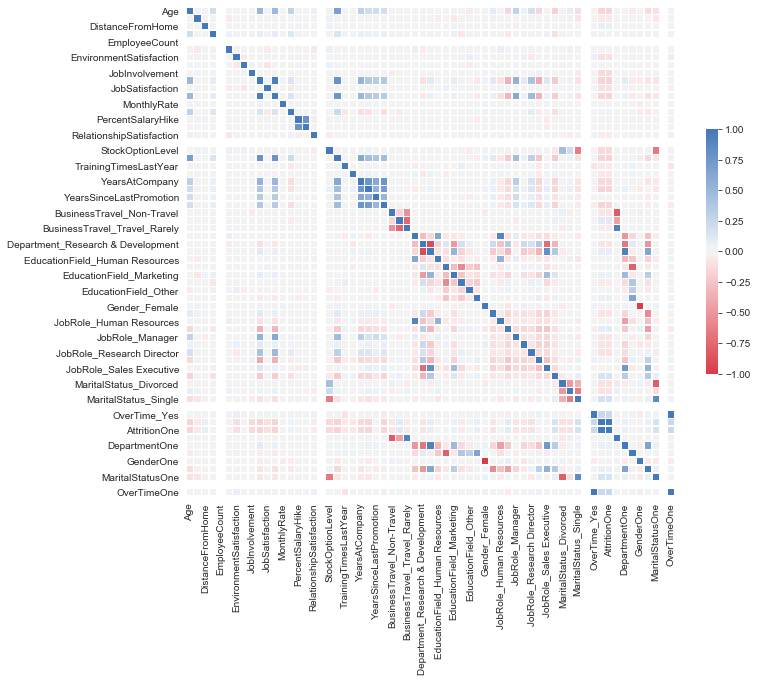

In [24]:
# Mapping feature correlation with a Seaborn heatmap  
# Referenced tutorial:  https://riptutorial.com/seaborn/example/31922/basic-correlation-plot

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, 
        cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, 
        center=0,
        vmin=-1)

Create group attribute for age



df.loc[df['Age'] < 20, 'Age_Group'] = '<20'
df.loc[(df['Age'] >=20 ) & (df['Age'] < 30), 'Age_Group'] = '>=20 & <30'
df.loc[(df['Age'] >=30 ) & (df['Age'] < 40), 'Age_Group'] = '>=30 & <40'
df.loc[(df['Age'] >=40 ) & (df['Age'] < 50), 'Age_Group'] = '>=40 & <50'
df.loc[(df['Age'] >=50 ), 'Age_Group'] = '>=50'


Create training and testing data set.

In [25]:
Categorical_Columns
#Columns_to_drop_for_Training=Categorical_Columns

#Columns_to_drop_for_Training.extend(['Target_Attrition_Flag','Age_group_Year', 'Age_group_Decade','Age_group_half_Decade'])


['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [26]:
df=df.drop(Categorical_Columns,axis=1)
Columns_to_drop_for_Training=['Target_Attrition_Flag','Age_group_Year', 'Age_group_Decade','Age_group_half_Decade']

# Split into train/test 

X_train, X_test, y_train, y_test = train_test_split(df.drop(Columns_to_drop_for_Training,axis=1), df['Target_Attrition_Flag'], test_size=0.25)	


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import LeakyReLU
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics
from keras import optimizers



# Build the neural network
##model = Sequential()
##model.add(Dense(25, input_dim=X_train.shape[1], activation='relu')) # Hidden 1
##model.add(Dense(10, activation='relu')) # Hidden 2

## model.add(Dense(1)) # Output

##model.add(Dense(y_train.shape[1],activation='softmax')) # Output
##model.compile(loss='categorical_crossentropy', optimizer='adam')
##model.fit(X_train,y_train,verbose=2,epochs=100)
##mean_squared_error
##sparse_categorical_crossentropy

#del model

#model = Sequential()
#model.add(Dense(25, input_dim = X_train.shape[1], activation=LeakyReLU(alpha=0.05))) # Hidden 1
#model.add(Dense(10, activation='relu')) # Hidden 2
##model.add(Dense(y_train.shape[1],activation='softmax')) # Output
#model.add(Dense(1,activation='softmax')) # Output
#sgd = tf.keras.optimizers.SGD(lr=0.8, momentum=0.9, nesterov=True)        
#model.compile(loss='binary_crossentropy', optimizer=sgd)

## Steven's Changes
#model.add(Dense(1,activation='sigmoid')) # Output
#sgd = tf.keras.optimizers.SGD(lr=.0000001, decay=1e-6, momentum=0.65, nesterov=False)# Best parm so far
##sgd = tf.keras.optimizers.SGD(lr=.00000001, decay=1e-3, momentum=0.5, nesterov=False)
#model.compile(loss='binary_crossentropy', optimizer=sgd)
#model.fit(X_train,y_train, verbose=2, epochs=100, batch_size=64)




## try leakyReLu
leaky = lambda x: tf.keras.layers.LeakyReLU(alpha=0.8)(x)

model = Sequential()
model.add(Dense(25, input_dim = X_train.shape[1], activation=leaky)) # Hidden 1
model.add(Dense(10, activation=leaky)) # Hidden 2
model.add(Dense(1,activation='sigmoid')) # Output
sgd = tf.keras.optimizers.SGD(lr=.000001, decay=1e-6, momentum=0.7, nesterov=False)# Best parm so far
model.compile(loss='binary_crossentropy', optimizer=sgd)
#adds an early stop incase the model gets stuck with higher epoch counts 
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-2, patience=3, 
                        verbose=1, mode='auto', restore_best_weights=True)
model.fit(X_train,y_train, verbose=2, epochs=400, batch_size=64)



Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


Instructions for updating:
Use tf.cast instead.
Epoch 1/400
 - 0s - loss: 3.6402
Epoch 2/400
 - 0s - loss: 3.5670
Epoch 3/400
 - 0s - loss: 3.4350
Epoch 4/400
 - 0s - loss: 3.4277
Epoch 5/400
 - 0s - loss: 3.4276
Epoch 6/400
 - 0s - loss: 3.4276
Epoch 7/400
 - 0s - loss: 3.4276
Epoch 8/400
 - 0s - loss: 3.4276
Epoch 9/400
 - 0s - loss: 3.4276
Epoch 10/400
 - 0s - loss: 3.4276
Epoch 11/400
 - 0s - loss: 3.4276
Epoch 12/400
 - 0s - loss: 3.4276
Epoch 13/400
 - 0s - loss: 3.4276
Epoch 14/400
 - 0s - loss: 3.4276
Epoch 15/400
 - 0s - loss: 3.4276
Epoch 16/400
 - 0s - loss: 3.4276
Epoch 17/400
 - 0s - loss: 3.4276
Epoch 18/400
 - 0s - loss: 3.4276
Epoch 19/400
 - 0s - loss: 3.4276
Epoch 20/400
 - 0s - loss: 3.4276
Epoch 21/400
 - 0s - loss: 3.4276
Epoch 22/400
 - 0s - loss: 3.4276
Epoch 23/400
 - 0s - loss: 3.4276
Epoch 24/400
 - 0s - loss: 3.4276
Epoch 25/400
 - 0s - loss: 3.4276
Epoch 26/400
 - 0s - loss: 3.4276
Epoch 27/400
 - 0s - loss: 3.4276
Epoch 28/400
 - 0s - loss: 3.4276
Epoch 29/

Epoch 231/400
 - 0s - loss: 3.4276
Epoch 232/400
 - 0s - loss: 3.4276
Epoch 233/400
 - 0s - loss: 3.4276
Epoch 234/400
 - 0s - loss: 3.4276
Epoch 235/400
 - 0s - loss: 3.4276
Epoch 236/400
 - 0s - loss: 3.4276
Epoch 237/400
 - 0s - loss: 3.4276
Epoch 238/400
 - 0s - loss: 3.4276
Epoch 239/400
 - 0s - loss: 3.4276
Epoch 240/400
 - 0s - loss: 3.4276
Epoch 241/400
 - 0s - loss: 3.4276
Epoch 242/400
 - 0s - loss: 3.4276
Epoch 243/400
 - 0s - loss: 3.4276
Epoch 244/400
 - 0s - loss: 3.4276
Epoch 245/400
 - 0s - loss: 3.4276
Epoch 246/400
 - 0s - loss: 3.4276
Epoch 247/400
 - 0s - loss: 3.4276
Epoch 248/400
 - 0s - loss: 3.4276
Epoch 249/400
 - 0s - loss: 3.4276
Epoch 250/400
 - 0s - loss: 3.4276
Epoch 251/400
 - 0s - loss: 3.4276
Epoch 252/400
 - 0s - loss: 3.4276
Epoch 253/400
 - 0s - loss: 3.4276
Epoch 254/400
 - 0s - loss: 3.4276
Epoch 255/400
 - 0s - loss: 3.4276
Epoch 256/400
 - 0s - loss: 3.4276
Epoch 257/400
 - 0s - loss: 3.4276
Epoch 258/400
 - 0s - loss: 3.4276
Epoch 259/400
 - 0s 

### Accuracy of model

#### Break out age groups
We want to break out the age groups and compare their accuracy amongst each other to get an understanding of bias in the data set. 

In [ ]:
#add back in age group 
pd.merge(X_test, df.drop(df.columns.difference(Columns_to_drop_for_Training), 1), left_index=True, right_index=True)

In [ ]:
#note: I see we have to varables that are related to eachother.  over 18 and age. 
X_test.columns

In [ ]:
X_test['<20'] = np.where(X_test['Age']<20, 1, 0)
X_test['>=20 & <30']= np.where(np.logical_and(X_test['Age']>=20, X_test['Age'] <30), 1, 0)
X_test['>=30 & <40']= np.where(np.logical_and(X_test['Age']>=30, X_test['Age'] <40), 1, 0)
X_test['>=40 & <50']= np.where(np.logical_and(X_test['Age']>=40, X_test['Age'] <50), 1, 0)
X_test['<50']= np.where(X_test['Age']>5, 1, 0)

In [ ]:
#np.where(X_test['Age']<20, 1, 0).sum()
print("# of obs for age less than 20: {}".format(np.where(X_test['Age']<20, 1, 0).sum()))
print("# of obs for age between 20 & 30: {}".format(np.where(np.logical_and(X_test['Age']>=20, X_test['Age'] <30), 1, 0).sum()))
print("# of obs for age between 30 & 40: {}".format(np.where(np.logical_and(X_test['Age']>=30, X_test['Age'] <40), 1, 0).sum()))
print("# of obs for age between 40 & 50: {}".format(np.where(np.logical_and(X_test['Age']>=40, X_test['Age'] <50), 1, 0).sum()))
print("# of obs for age greater than 50: {}".format(np.where(X_test['Age']>5, 1, 0).sum()))

In [ ]:
# get overall accuracy 
pred = pd.DataFrame(model.predict(X_test.drop(['<20','>=20 & <30','>=30 & <40','>=40 & <50','<50'],axis=1)))
y_compare = y_test
score = metrics.accuracy_score(y_compare, pred.astype(np.int32))


#Get the predictions for only specified age groups
pred20 = pd.DataFrame(model.predict(X_test.loc[X_test['<20'] == 1].drop(['<20','>=20 & <30','>=30 & <40','>=40 & <50','<50'],axis=1)))
pred20_30 = pd.DataFrame(model.predict(X_test.loc[X_test['>=20 & <30'] == 1].drop(['<20','>=20 & <30','>=30 & <40','>=40 & <50','<50'],axis=1)))
pred30_40 = pd.DataFrame(model.predict(X_test.loc[X_test['>=30 & <40'] == 1].drop(['<20','>=20 & <30','>=30 & <40','>=40 & <50','<50'],axis=1)))
pred40_50 = pd.DataFrame(model.predict(X_test.loc[X_test['>=40 & <50'] == 1].drop(['<20','>=20 & <30','>=30 & <40','>=40 & <50','<50'],axis=1)))
pred50 = pd.DataFrame(model.predict(X_test.loc[X_test['<50'] == 1].drop(['<20','>=20 & <30','>=30 & <40','>=40 & <50','<50'],axis=1)))

# get only the actuals based on the index of the independent variables within the specified age group
y_compare20 = y_test[X_test.loc[X_test['<20'] == 1].index]
y_compare20_30 = y_test[X_test.loc[X_test['>=20 & <30'] == 1].index]
y_compare30_40 = y_test[X_test.loc[X_test['>=30 & <40'] == 1].index]
y_compare40_50 = y_test[X_test.loc[X_test['>=40 & <50'] == 1].index]
y_compare50 = y_test[X_test.loc[X_test['<50'] == 1].index]


#Get scores for each age group
score20 = metrics.accuracy_score(y_compare20, pred20.astype(np.int32))
score20_30 = metrics.accuracy_score(y_compare20_30, pred20_30.astype(np.int32))
score30_40 = metrics.accuracy_score(y_compare30_40, pred30_40.astype(np.int32))
score40_50 = metrics.accuracy_score(y_compare40_50, pred40_50.astype(np.int32))
score50 = metrics.accuracy_score(y_compare50, pred50.astype(np.int32))                                      
                                       
print("Accuracy score for age less than 20: {}".format(score20))
print("Accuracy score for age between 20 and 30: {}".format(score20_30))
print("Accuracy score for age between 20 and 30: {}".format(score30_40))
print("Accuracy score for age greater than 50: {}".format(score50))                                       
print("Accuracy score overall: {}".format(score))